Car Price Prediction Using Machine Learning: An Introduction
Predicting car prices is a significant challenge in the automotive industry, encompassing a range of factors such as vehicle specifications, market conditions, and historical sales data. By leveraging machine learning techniques, we can create models that accurately estimate the price of a car based on various features. This introduction provides an overview of the process and methodologies involved in developing a car price prediction model using machine learning.

# Machine Learning Algorithms for Car Price Prediction

Car price prediction is a complex task that involves analyzing various features of vehicles to estimate their market value. Different machine learning algorithms can be employed to create robust models for this purpose. Here, we introduce three commonly used algorithms:
Bayesian Regression,
Random Forest,
Gradient Boosting,
and explain how they are applied in car price prediction.

# 1. Bayesian Regression
Overview:
Bayesian Regression is a statistical method that applies Bayes' theorem to linear regression, incorporating prior knowledge into the model. It estimates the probability distribution of the model parameters rather than just point estimates.

Application in Car Price Prediction:

Data Preparation: Collect and preprocess data, ensuring that features like car make, model, year, mileage, and others are correctly encoded and normalized.
Model Training: Use the training data to fit the Bayesian regression model, incorporating prior distributions for the model parameters.
Prediction: Generate predictions by calculating the posterior distributions of the parameters given the data, resulting in a probabilistic estimate of car prices.
Advantages:

Incorporates prior knowledge, which can improve predictions when data is sparse.
Provides uncertainty estimates for predictions, useful for risk assessment.

# 2. Random Forest
Overview:
Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the average prediction of the individual trees. It is robust to overfitting and handles non-linear relationships well.

Application in Car Price Prediction:

Data Preparation: Similar to other models, preprocess and encode features appropriately.
Model Training: Train the Random Forest model using the training dataset. The model creates multiple decision trees, each trained on a random subset of the data and features.
Prediction: Aggregate the predictions from all the individual trees to produce the final car price estimate.
Advantages:

Handles a large number of features and complex interactions between them.
Provides high accuracy and robustness to overfitting.

# 3. Gradient Boosting
Overview:
Gradient Boosting is an ensemble technique that builds models sequentially. Each new model corrects errors made by the previous ones. The final prediction is a weighted sum of the predictions from all models.

Application in Car Price Prediction:

Data Preparation: Preprocess and encode the data, ensuring all relevant features are included.
Model Training: Train the Gradient Boosting model by iteratively adding decision trees that minimize the prediction error of the combined ensemble.
Prediction: Sum the weighted predictions of all the trees in the ensemble to estimate the car prices.
Advantages:

Excellent predictive performance, especially for complex datasets with non-linear relationships.
Can handle outliers and missing values effectively.

# Car Price Prediction Using Linear Regression

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df=pd.read_csv("C:\\Users\\garvit\\Downloads\\Car Dataset.csv")

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
len(df.columns)

8

In [8]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [9]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [10]:
df['km_driven'].max()

806599

In [11]:
df['km_driven'].min()

1

In [12]:
df[['name','km_driven']].max()

name         Volvo XC60 D5 Inscription
km_driven                       806599
dtype: object

In [13]:
df.isnull().sum()/len(df)*100

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

In [14]:
df.groupby(['owner','name'])['selling_price'].max()

owner        name                                 
First Owner  Audi A4 2.0 TDI                          1295000
             Audi A4 2.0 TDI 177 Bhp Premium Plus     1150000
             Audi A4 3.0 TDI Quattro                  1580000
             Audi A4 30 TFSI Technology               3100000
             Audi A4 35 TDI Premium Plus              3256000
                                                       ...   
Third Owner  Volkswagen Polo Diesel Highline 1.2L      335000
             Volkswagen Polo Diesel Trendline 1.2L     175000
             Volkswagen Vento Diesel Highline          260000
             Volkswagen Vento Petrol Highline AT       300000
             Volvo XC60 D3 Kinetic                    1750000
Name: selling_price, Length: 2001, dtype: int64

<AxesSubplot:>

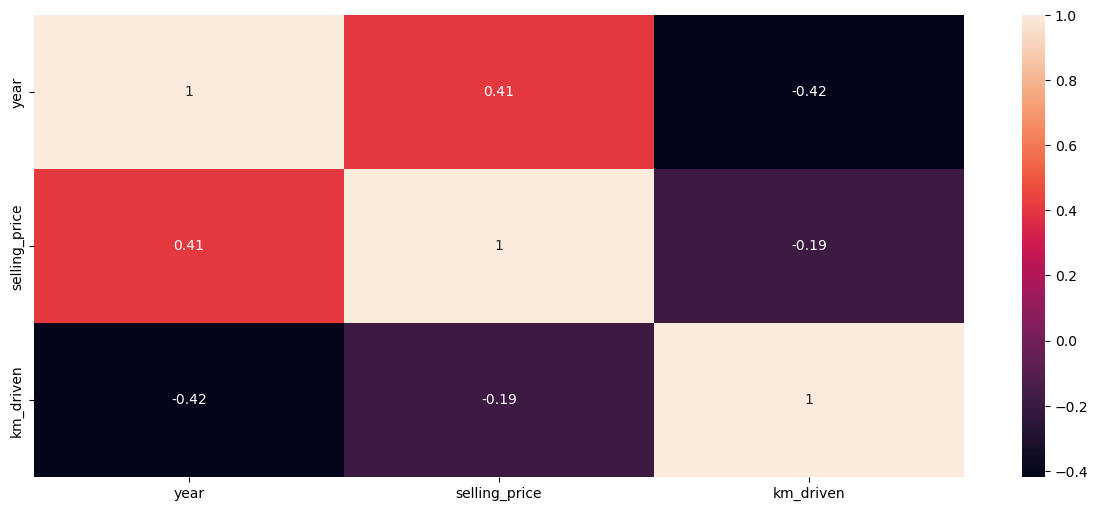

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [16]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [17]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [19]:
df['name'].nunique()

1491

In [20]:
df['company']=df['name'].apply(lambda x:x.split()[0].capitalize())

In [21]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai


In [22]:
df['company'].nunique()

29

In [23]:
df.drop('name',axis=1,inplace=True)

In [24]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [25]:
df= pd.get_dummies(df,drop_first=True)

In [26]:
df

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,company_Mg,company_Mitsubishi,company_Nissan,company_Opelcorsa,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo
0,2007,60000,70000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,2014,409999,80000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4337,2009,110000,83000,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,2016,865000,90000,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
len(df.columns)

42

# Spliting into x and y
# Train and Test Split
# Linear Regression
# For Performance Check (MAE,MSE,RMSE,R square, adj R square)

In [28]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [62]:
x_train

array([[0.68      , 0.22935713, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.72      , 0.07639865, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.04453768, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.72      , 0.09918076, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48      , 0.06694661, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88      , 0.04958976, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
y_train

1451    300000
728     599000
1270    310000
4076    595000
3232    400000
         ...  
4149    675000
1890    300000
350     335000
79      200000
3927    650000
Name: selling_price, Length: 3472, dtype: int64

# Train_test_split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [66]:
x_train

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,...,company_Mg,company_Mitsubishi,company_Nissan,company_Opelcorsa,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo
1451,2012,185000,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
728,2013,61624,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1270,2015,35925,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4076,2014,56600,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3232,2012,120000,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,2013,73000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1890,2006,120000,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
350,2013,80000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79,2007,54000,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y_train

1451    300000
728     599000
1270    310000
4076    595000
3232    400000
         ...  
4149    675000
1890    300000
350     335000
79      200000
3927    650000
Name: selling_price, Length: 3472, dtype: int64

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
y_test=scaler.transform(x_test)

In [69]:
x_train

array([[0.68      , 0.22935713, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.72      , 0.07639865, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.04453768, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.72      , 0.09918076, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48      , 0.06694661, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88      , 0.04958976, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [71]:
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
x_train

array([[0.68      , 0.22935713, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.72      , 0.07639865, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.04453768, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.72      , 0.09918076, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48      , 0.06694661, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88      , 0.04958976, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
print('Simple linear Models score' , lr.score(x_train,y_train)*100)

Simple linear Models score 66.72111089097193


In [74]:
from  sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)


In [75]:
x_poly=poly_reg.fit_transform(x_train)

In [76]:
p_reg=LinearRegression()

In [77]:
p_reg.fit(x_poly,y_train)

LinearRegression()

In [78]:
print('Polynomial Model Score',p_reg.score(x_poly,y_train)*100)

Polynomial Model Score 88.90122723355259


# Evaluating Model's Performance

In [54]:
from sklearn import metrics

In [55]:
y_predict = lr.predict(x_test)

# Mean Absolute Error

In [ ]:
MAE= metrics.mean_absolute_error(y_test,y_predict)

In [ ]:
MAE

# Mean Squared Error

In [ ]:
MSE=metrics.mean_squared_error(y_test,y_predict)

In [ ]:
MSE

# ROOT MEAN SQUARED ERROR

In [ ]:
RMSE=np.sqrt(MSE)

In [ ]:
RMSE

# Summary
Each of these algorithms has its strengths and can be chosen based on the specific requirements of the car price prediction task. Bayesian Regression provides probabilistic predictions, useful for uncertainty estimation. Random Forest is robust and handles large feature sets well. Gradient Boosting offers high accuracy and handles complex relationships effectively. By carefully selecting and tuning these algorithms, reliable and accurate car price prediction models can be developed.